# Logistic Regression

Logistic regression is a fundamental statistical method used for binary classification tasks, where the goal is to predict one of two possible outcomes based on input variables. It is widely utilized in fields like machine learning, medical research, and social sciences due to its simplicity and interpretability.

## Assumptions and Limitations

Logistic regression relies on several assumptions:

- **Independence of observations:** Each sample should be independent.
- **Linear relationship with log-odds:** Features should have a linear relationship with the log-odds of the outcome.
- **No multicollinearity:** Strong correlations between predictors can distort coefficient estimates.

However, logistic regression has limitations. It struggles with highly non-linear decision boundaries and may not perform well when dealing with large numbers of irrelevant features. In such cases, feature engineering or more complex models may be needed.

## Mathematical Background

At its core, logistic regression models the probability that a given input belongs to a particular class. Unlike linear regression, which predicts continuous outcomes, logistic regression constrains predictions to a probability range between 0 and 1. A linear model, if applied directly to classification, could produce outputs outside this range, making it unsuitable for probability estimation.

### The Logistic Function

The logistic function, also known as the sigmoid function, is defined as:

$$
\sigma(t) = \frac{1}{1 + e^{-t}}
$$

This function maps any real-valued number into the (0, 1) interval, making it suitable for probability estimation. It is a smooth, S-shaped function that asymptotically approaches 0 and 1, ensuring that probability values are well-defined.

### Model Representation

In logistic regression, the linear combination of input features $X$ and their corresponding coefficients $\boldsymbol{\beta}$ is passed through the logistic function to predict the probability $p$ of the positive class:

$$
p = \sigma(\beta_0 + \beta_1 X_1 + \beta_2 X_2 + \ldots + \beta_n X_n)
$$

Alternatively, using matrix notation:

$$
p = \sigma(\mathbf{X} \boldsymbol{\beta})
$$

or equivalently using summation notation:

$$
p = \sigma \left( \sum_{j=0}^{n} \beta_j X_j \right)
$$

where $\mathbf{X}$ is the feature matrix and $\boldsymbol{\beta}$ is the coefficient vector. Here, $\beta_0$ is the intercept term, and $\beta_1, \beta_2, \ldots, \beta_n$ are the coefficients for each feature.

### Connection to the Binomial Distribution

Logistic regression is based on the assumption that the dependent variable follows a **binomial distribution**. Given a binary outcome $y_i$ that takes values 0 or 1, the probability of success ($y_i = 1$) is modeled as:

$$
P(y_i = 1 | X_i) = p_i = \sigma(\mathbf{X}_i \boldsymbol{\beta})
$$

Similarly, the probability of failure ($y_i = 0$) is:

$$
P(y_i = 0 | X_i) = 1 - p_i
$$

or

$$
P(y_i = 0 | X_i) = 1 - \sigma(\mathbf{X}_i \boldsymbol{\beta})
$$

The binomial probability mass function (PMF) is given by:

$$
P(y_i | X_i) = p_i^{y_i} (1 - p_i)^{(1 - y_i)}
$$

Since each observation follows a Bernoulli distribution (a special case of the binomial distribution with a single trial), the likelihood function is derived from the product of Bernoulli probabilities across all observations. This leads to the formulation of **maximum likelihood estimation (MLE)** for parameter optimization.

### Odds and Log-Odds

The odds represent the ratio of the probability of the event occurring to it not occurring:

$$
\text{Odds} = \frac{p}{1 - p}
$$

Taking the natural logarithm of the odds yields the log-odds (or logit):

$$
\text{Logit}(p) = \log\left(\frac{p}{1 - p}\right) = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \ldots + \beta_n X_n
$$

### Interpretation of Coefficients

This linear relationship between the log-odds and the input features forms the basis of logistic regression. The coefficients $\beta_j$ in logistic regression can be interpreted as follows:

- A **positive** coefficient $\beta_j$ means that an increase in $X_j$ increases the log-odds of the event occurring, meaning that the probability of the event occurring increases.
- A **negative** coefficient $\beta_j$ means that an increase in $X_j$ decreases the log-odds of the event occurring, meaning that the probability of the event occurring decreases.
- The **magnitude** of $\beta_j$ determines the strength of the effect that $X_j$ has on the log-odds.
- The exponentiated coefficient, $e^{\beta_j}$, represents the **odds ratio**, which tells us how the odds of the event change for a one-unit increase in $X_j$. Specifically:
  - If $e^{\beta_j} > 1$, the odds of the event increase.
  - If $e^{\beta_j} < 1$, the odds of the event decrease.
  - If $e^{\beta_j} = 1$, $X_j$ has no effect on the odds.

For example, if $\beta_j = 0.7$, then $e^{0.7} \approx 2.01$, meaning that a one-unit increase in $X_j$ doubles the odds of the event occurring.

These interpretations make logistic regression a useful tool in various domains. In medical research, for instance, $\beta_j$ values can help assess the impact of a risk factor (e.g., smoking) on the likelihood of disease occurrence. In marketing, they can reveal how different factors (e.g., ad spend) influence the probability of a customer making a purchase. The ability to directly interpret coefficients in terms of odds ratios makes logistic regression a highly valuable and intuitive statistical modeling approach.



In [54]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [55]:
from sklearn.datasets import load_iris

iris = load_iris()

X = iris.data
y = (iris.target == 2).astype(int)  # Binary target: 1 if 'Iris-Virginica', else 0

features = iris.feature_names

In [56]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Create a new variable called y. For each flower in the dataset, if it's an 'Iris-Virginica' (represented by the number 2), assign a value of 1 to y. Otherwise, assign a value of 0.


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=42)

In [58]:
y_train

array([0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

<Axes: ylabel='count'>

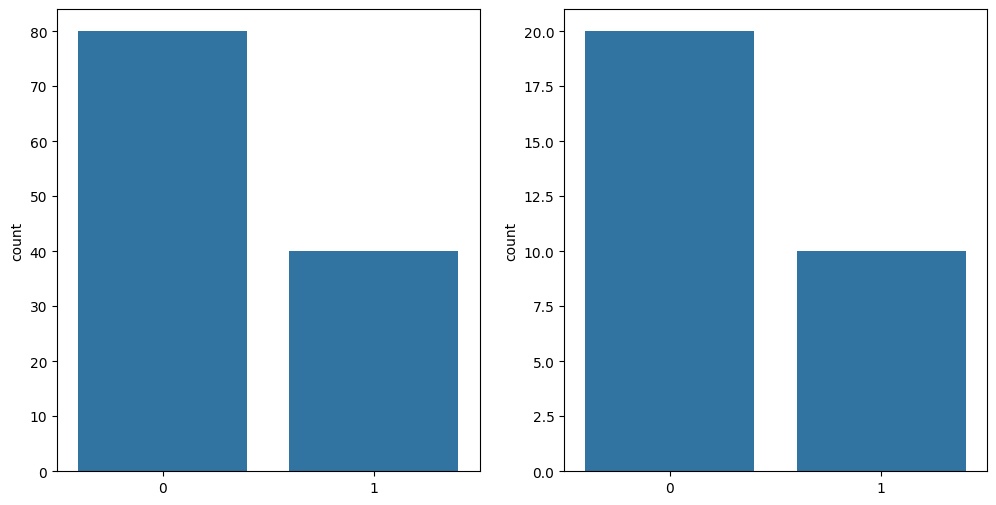

In [59]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.countplot(x = y_train, ax = ax[0])
sns.countplot(x = y_test, ax = ax[1])

In [60]:
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [61]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 1.00


<Axes: >

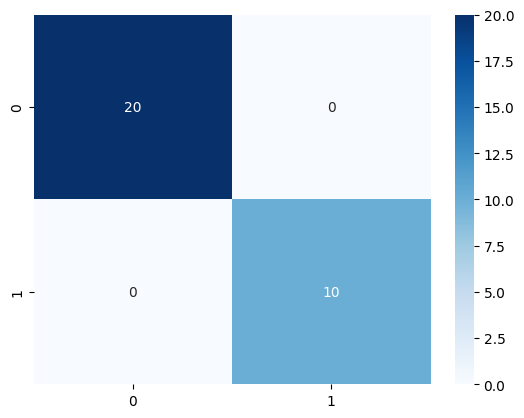

In [62]:
# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')

The coefficients $( \beta )$ in logistic regression indicate the direction and magnitude of the relationship between each feature and the log-odds of the outcome. A positive coefficient suggests that as the feature value increases, the log-odds of the outcome occurring increase, and vice versa for a negative coefficient.

To access the coefficients in the trained model:






In [63]:
# Intercept
intercept = model.intercept_
print(f'Intercept: {intercept}')

# Coefficients
coefficients = model.coef_
print(f'Coefficients: {coefficients}')

# Feature names
print(f'Features: {features}')

Intercept: [-13.51057132]
Coefficients: [[-0.26379832 -0.47648262  2.65659369  2.11964766]]
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


## Understanding Model Coefficients

Understanding these coefficients can provide valuable insights into the influence of each feature on the predicted outcome.

### Intercept (`model.intercept_`)

#### Meaning  
The intercept represents the **log-odds** of the target variable (*Iris-Virginica* in this case) being 1 when all predictor variables (*sepal length, sepal width, petal length, petal width*) are 0.

#### In the Code  
```python
intercept = model.intercept_
```
This retrieves the intercept value.

#### Interpretation  
- The intercept is often less practically meaningful in real-world scenarios, especially when predictor values of 0 are unrealistic (such as in flower measurements).  
- It serves as the **baseline log-odds** before considering the impact of the predictor variables.

### Coefficients (`model.coef_`)

#### Meaning  
Each coefficient corresponds to a specific predictor variable. They represent the **change in log-odds** of the target variable for a **one-unit change** in the corresponding predictor, holding other predictors constant.

$$
\text{Logit}(p) = \log\left(\frac{p}{1 - p}\right) = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \ldots + \beta_n X_n
$$

#### In the Code  
```python
coefficients = model.coef_
```
This retrieves the coefficients as an array. Since there are 4 features, you'll get 4 coefficients.

#### Interpretation  
- **Positive Coefficient**: A positive coefficient means that an increase in the predictor variable **increases** the log-odds of the target being 1 (*Iris-Virginica*).  
- **Negative Coefficient**: A negative coefficient means that an increase in the predictor variable **decreases** the log-odds of the target being 1.  
- **Magnitude**: The larger the absolute value of a coefficient, the stronger its influence on the outcome.

#### Example  
If the coefficient for **petal length** is `2.5`, this means:  
> For every **one-unit increase** in petal length, the **log-odds** of the flower being *Virginica* increase by `2.5`, assuming other features remain constant. That is, the odds of *Virginica* prediction increases by $e^{2.5} \approx 12.18$.

### Important Considerations  

#### Log-Odds vs. Probabilities  
- These coefficients are in terms of **log-odds**, **not probabilities**.  
- To obtain probabilities, apply the **sigmoid function**
  The model performs this internally for predictions.

#### Feature Scaling  
- If your features have **vastly different scales**, consider **scaling them** before training the model.  
- This helps with coefficient interpretation and ensures a more stable model.

In [64]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

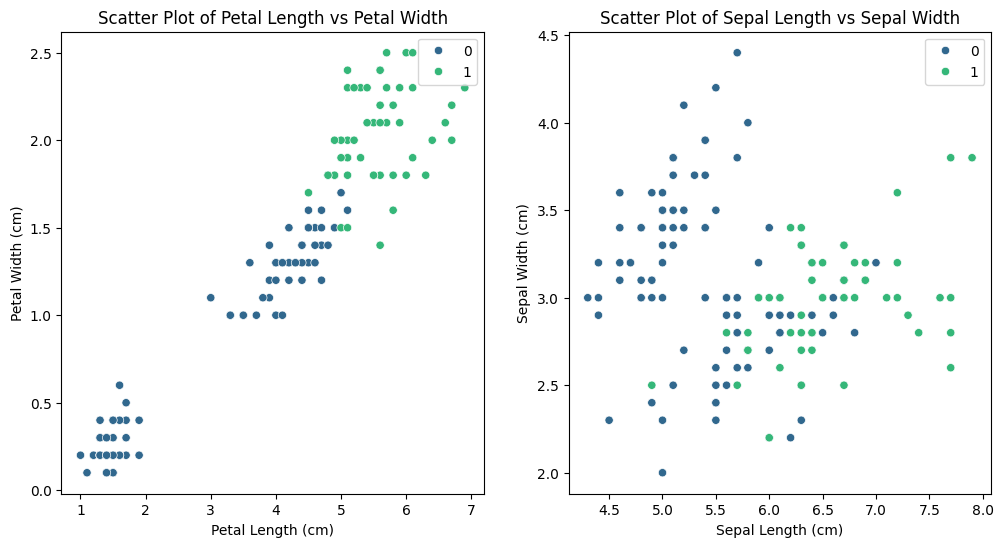

In [65]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.scatterplot(x = X[:, 2], y = X[:, 3], hue = y, palette = 'viridis', ax = ax[0])
ax[0].set_xlabel('Petal Length (cm)')
ax[0].set_ylabel('Petal Width (cm)')
ax[0].set_title('Scatter Plot of Petal Length vs Petal Width')

sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = y, palette = 'viridis', ax = ax[1])
ax[1].set_xlabel('Sepal Length (cm)')
ax[1].set_ylabel('Sepal Width (cm)')
ax[1].set_title('Scatter Plot of Sepal Length vs Sepal Width')

plt.show()

In [66]:
# Example Boundary Point
example_point = np.array([[6.0, 3.5, 5.0, 1.7]])

In [67]:
weighted_sum = np.dot(example_point, coefficients.T) + intercept
probability = 1 / (1 + np.exp(-weighted_sum))

print('Weighted Sum: ', weighted_sum)
print('Probability of Virginica: ', probability)

Weighted Sum:  [[0.12531905]]
Probability of Virginica:  [[0.53128883]]


In [68]:
# Simple Point to Predict
example_point = [7.0, 3.0, 6.5, 2.3]

weighted_sum = np.dot(example_point, coefficients.T) + intercept
probability = 1 / (1 + np.exp(-weighted_sum))

print('Weighted Sum: ', weighted_sum)
print('Probability of Virginica: ', probability)

Weighted Sum:  [5.35644118]
Probability of Virginica:  [0.99530449]


In [83]:
xx.ravel().shape

(347600,)

In [81]:
xx_0.ravel().shape

(246400,)

In [82]:
yy_0.ravel().shape

(246400,)

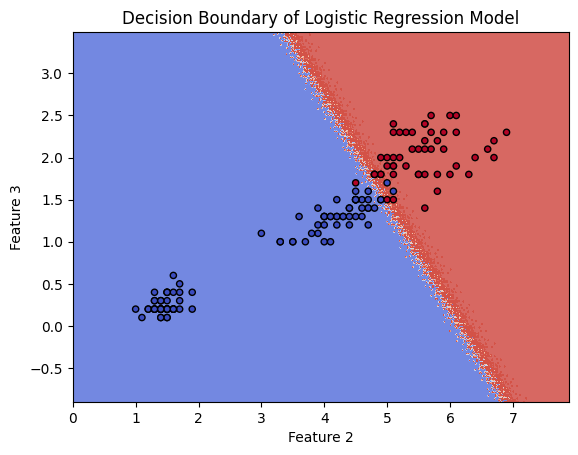

In [99]:
# Define the mesh grid for Features 2 and 3 (since we can only plot 2D)
x_min, x_max = X[:, 2].min() - 1, X[:, 2].max() + 1  # Feature 2
y_min, y_max = X[:, 3].min() - 1, X[:, 3].max() + 1  # Feature 3
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Repeat entire dataset for prediction, replacing Features 2 and 3 with mesh values
X_test = np.tile(X, (xx.ravel().shape[0] // X.shape[0] + 1, 1))[:xx.ravel().shape[0], :]
X_test[:, 2] = xx.ravel()  # Feature 2 varies
X_test[:, 3] = yy.ravel()  # Feature 3 varies

# Predict the class for each point in the mesh grid
Z = model.predict(X_test)
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)

# Scatter plot for the original data points (only Features 2 and 3)
plt.scatter(X[:, 2], X[:, 3], c=y, edgecolors='k', marker='o', s=20, cmap=plt.cm.coolwarm)

plt.xlabel('Feature 2')
plt.ylabel('Feature 3')
plt.title('Decision Boundary of Logistic Regression Model')

plt.show()


In [71]:
'''Steps To Calculate Probability of a Class given Logistic Model:

### Gather the Intercept and Coefficients: You already have these from your trained model:

intercept = model.intercept_    # -12.83 in this case
   coefficients = model.coef_   # An array of coefficients

### Input Feature Values: Let's assume you have a new set of feature values for an Iris flower:

new_features = [sepal_length, sepal_width, petal_length, petal_width]

### Replace these placeholders with the actual values you want to predict for.

### Calculate the Linear Combination: This involves multiplying each feature value by its corresponding coefficient and adding them together along with the intercept:

linear_combination = intercept + coefficients[0][0] * new_features[0] + \
                          coefficients[0][1] * new_features[1] + \
                          coefficients[0][2] * new_features[2] + \
                          coefficients[0][3] * new_features[3]

### Make sure to adjust the indices of coefficients if you have more or fewer features.

### Apply the Logistic Function: This converts the linear combination (log-odds) into a probability between 0 and 1:

probability = 1 / (1 + np.exp(-linear_combination))
'''

"Steps To Calculate Probability of a Class given Logistic Model:\n\n### Gather the Intercept and Coefficients: You already have these from your trained model:\n\nintercept = model.intercept_    # -12.83 in this case\n   coefficients = model.coef_   # An array of coefficients\n\n### Input Feature Values: Let's assume you have a new set of feature values for an Iris flower:\n\nnew_features = [sepal_length, sepal_width, petal_length, petal_width]\n\n### Replace these placeholders with the actual values you want to predict for.\n\n### Calculate the Linear Combination: This involves multiplying each feature value by its corresponding coefficient and adding them together along with the intercept:\n\nlinear_combination = intercept + coefficients[0][0] * new_features[0] +                           coefficients[0][1] * new_features[1] +                           coefficients[0][2] * new_features[2] +                           coefficients[0][3] * new_features[3]\n\n### Make sure to adjust the i

**Interpretation**:

The resulting probability value represents the model's predicted probability of the Iris flower with the given features belonging to the 'Iris-Virginica' class.
If probability is greater than 0.5, the model predicts the flower as 'Iris-Virginica'.
If probability is less than 0.5, the model predicts the flower as not 'Iris-Virginica'.

**Example**:

Let's say your new_features are [6.0, 3.0, 5.0, 2.0]. The calculation would look like this:


linear_combination = -12.83 + coefficients[0][0] * 6.0 + coefficients[0][1] * 3.0 + \
                      coefficients[0][2] * 5.0 + coefficients[0][3] * 2.0
probability = 1 / (1 + np.exp(-linear_combination))

Replace coefficients[0][0], coefficients[0][1], etc., with the actual coefficient values from your model. The resulting probability would be the model's prediction for this specific set of features.